In [179]:
import pandas as pd
from scipy.stats import pearsonr
data = pd.read_csv("table.how_similar.nok.txt", sep='\t')

In [180]:
data['bin_sz'] = pd.cut(data['szsim'], [0, 0.80, 0.85, 0.90, 0.95, 1.01], labels=["<0.8", "0.85", "0.90", "0.95", "1"])
data['bin_sim'] = pd.cut(data['unroll'], [0, 0.80, 0.85, 0.90, 0.95, 1.01], labels=["<0.8", "0.85", "0.90", "0.95", "1"])

In [181]:
data['bin_len'] = pd.cut(data['sz1'], [0, 50, 100, 500, 1000, 900000], labels=["0", "50", "100", "1000", "big"])

In [182]:
len(data)

904

In [176]:
print(pearsonr(data['seqsim'], data['pj']))

PearsonRResult(statistic=0.953444540233332, pvalue=0.0)


[Text(0.5, 1.0, 'Kmer estimate of sequence similarity'),
 Text(0.5, 0, 'Sequence Similarity'),
 Text(0, 0.5, 'Kmer Count Similarity')]

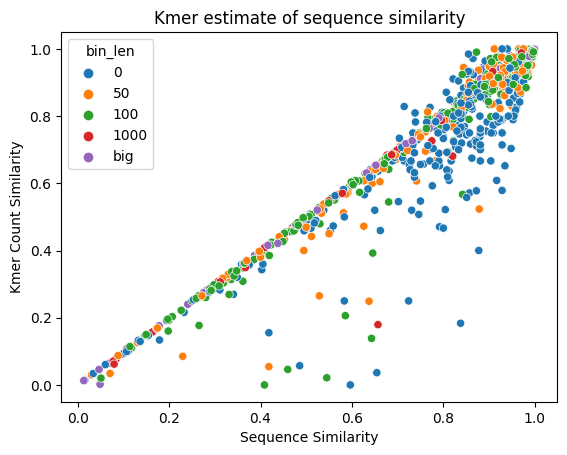

In [183]:
import seaborn as sb
p = sb.scatterplot(data=data, x='seqsim', y='pj', hue='bin_len')
p.set(title="Kmer estimate of sequence similarity", xlabel="Sequence Similarity", ylabel="Kmer Count Similarity")

In [166]:
print(pearsonr(data['unroll'], data['pj']))

PearsonRResult(statistic=0.9361582055174525, pvalue=0.0)


[Text(0.5, 1.0, 'Kmer estimate of unroll sequence similarity'),
 Text(0.5, 0, 'Unroll Sequence Similarity'),
 Text(0, 0.5, 'Kmer Count Similarity')]

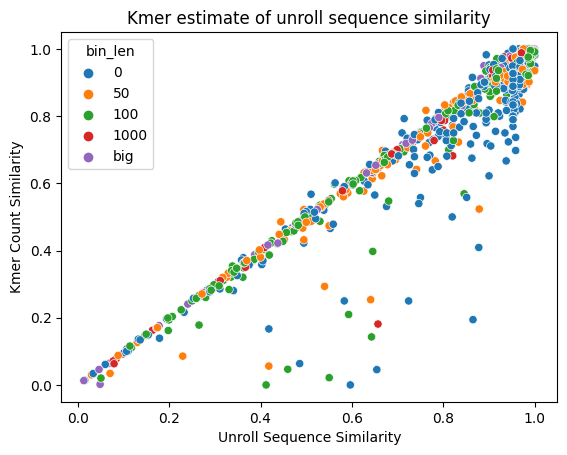

In [178]:
import seaborn as sb
p = sb.scatterplot(data=data, x='unroll', y='pj', hue='bin_len')
p.set(title="Kmer estimate of unroll sequence similarity", xlabel="Unroll Sequence Similarity", ylabel="Kmer Count Similarity")

/Users/english/py/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Cosine Sim by Sequence Similarity'), Text(0.5, 0, 'pj')]

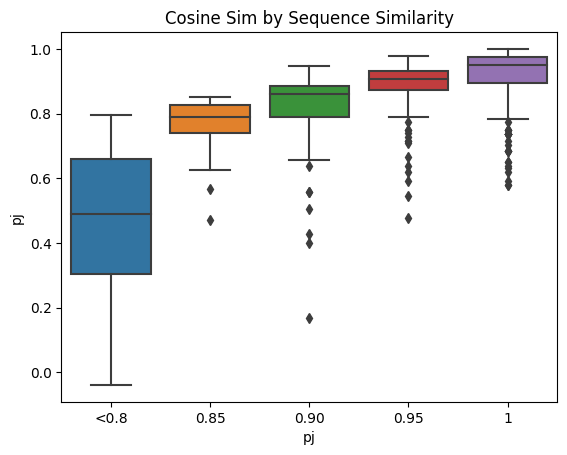

In [134]:
p = sb.boxplot(data=data, x="bin_sim", y="pj") 
p.set(title="Cosine Sim by Sequence Similarity", xlabel="pj")

/Users/english/py/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Cosine Sim by Sequence Similarity (≥90% size sim)'),
 Text(0.5, 0, 'seqsim')]

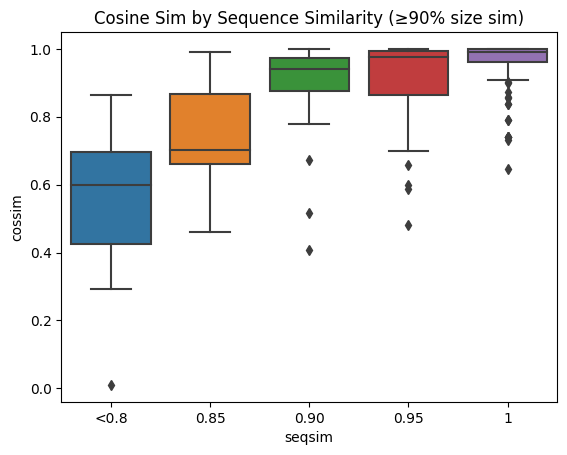

In [99]:
p = sb.boxplot(data=data[data['szsim'] >= 0.90], x="bin_sim", y="cossim") 
p.set(title="Cosine Sim by Sequence Similarity (≥90% size sim)", xlabel="seqsim")

In [14]:
len(list(nx.all_simple_paths(G, 'src', 'D')))

8

In [114]:
import networkx as nx
import heapq
import random

# Create a directed graph with node sizes
G = nx.DiGraph()
G.add_nodes_from([
    ('src', {'size':0}),
    ('A', {'size': 5}),
    ('B', {'size': 10}),
    ('C', {'size': 7}),
    ('D', {'size': 8}),
    ('E', {'size': 3}),
    ('F', {'size': 20}),
    ('G', {'size': -4}),
])

for i in "ABCDEFG":
    G.add_edge('src', i)
    G.add_edge(i, 'snk')
# Add directed edges
G.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('A', 'D'),
    ('A', 'E'),
    ('A', 'F'),
    ('A', 'G'),
    ('B', 'C'),
    ('B', 'D'),
    ('B', 'E'),
    ('B', 'F'),
    ('B', 'G'),
    ('C', 'D'),
    ('C', 'E'),
    ('C', 'F'),
    ('C', 'G'),
    ('D', 'E'),
    ('D', 'F'),
    ('D', 'G'),
    ('E', 'F'),
    ('E', 'G'),
    ('F', 'G'),
])

In [111]:
def remove_edges_not_passing_through(graph, source, sink, kept_nodes):
    visited = set()

    def dfs(node):
        visited.add(node)
        for predecessor in graph.predecessors(node):
            if predecessor not in visited:
                dfs(predecessor)

    dfs(sink)

    edges_to_remove = [(predecessor, node) for node in visited for predecessor in graph.predecessors(node) if node not in kept_nodes]
    graph.remove_edges_from(edges_to_remove)

In [113]:

def find_top_n_paths(graph, start_node, target_size, n):
    top_paths = []
    attempts = 0
    threshold = float('inf')
    def dfs(current_path, current_size):
        nonlocal attempts, threshold
        attempts += 1
        sizediff = abs(current_size - target_size)

        if sizediff > threshold:
            return
        
        heapq.heappush(top_paths, (sizediff, current_path))
        
        #threshold = top_paths[0][0] + 100000 
        # Without: nattempts 128
        # Path 1: ['src', 'A', 'C', 'D'], Total Size: 20, Size Difference from Target: 0
        # Path 2: ['src', 'B', 'C', 'E'], Total Size: 20, Size Difference from Target: 0
        # Path 3: ['src', 'F'], Total Size: 20, Size Difference from Target: 0
        
        #threshold = sorted(top_paths)[min(3, len(top_paths)-1)][0] + 9 # But 8 fails.
        # With: nattempts 37
        # Path 1: ['src', 'F'], Total Size: 20, Size Difference from Target: 0
        # Path 2: ['src', 'A', 'B', 'C', 'E', 'G'], Total Size: 21, Size Difference from Target: 1
        # Path 3: ['src', 'A', 'B', 'D', 'G'], Total Size: 19, Size Difference from Target: 1
        for successor in graph.successors(current_path[-1]):
            next_path = current_path + [successor]
            next_size = current_size + graph.nodes[successor]['size']
            dfs(next_path, next_size)

    dfs([start_node], graph.nodes[start_node]['size'])
    print('nattempts', attempts)
    return sorted(top_paths)[:n]

# Example usage
start_node = 'src'
target_size = 20
n = 3
top_paths = find_top_n_paths(G, start_node, target_size, n)

for i, (size_diff, path) in enumerate(top_paths, 1):
    total_size = sum(G.nodes[node]['size'] for node in path)
    print(f"Path {i}: {path}, Total Size: {total_size}, Size Difference from Target: {size_diff}")


nattempts 128
Path 1: ['src', 'A', 'C', 'D'], Total Size: 20, Size Difference from Target: 0
Path 2: ['src', 'B', 'C', 'E'], Total Size: 20, Size Difference from Target: 0
Path 3: ['src', 'F'], Total Size: 20, Size Difference from Target: 0


In [115]:
remove_edges_not_passing_through(G, 'src', 'snk', list("BEF")) 

In [116]:
top_paths = find_top_n_paths(G, start_node, target_size, n)

for i, (size_diff, path) in enumerate(top_paths, 1):
    total_size = sum(G.nodes[node]['size'] for node in path)
    print(f"Path {i}: {path}, Total Size: {total_size}, Size Difference from Target: {size_diff}")

nattempts 8
Path 1: ['src', 'F'], Total Size: 20, Size Difference from Target: 0
Path 2: ['src', 'E', 'F'], Total Size: 23, Size Difference from Target: 3
Path 3: ['src', 'B', 'E'], Total Size: 13, Size Difference from Target: 7


In [53]:
from dataclasses import dataclass

@dataclass
class Node():
    value: int = 0
    def __hash__(self):
        return self.value

In [69]:
aNodes = [Node(1), Node(10), Node(20)]
import networkx as nx
g = nx.DiGraph()
one = Node(1)
nine = Node(9)
four = Node(4)
twenty = Node(20)
for i in [one, nine, four, twenty]:
    g.add_edge('src', i)
    g.add_edge(i, 'snk')
g.add_edge(one, nine)
g.add_edge(one, four)
g.add_edge(one, twenty)
g.add_edge(nine, twenty) # can only use one of nine/twenty
g.add_edge(four, twenty)

In [12]:
import kdp
import logging
import pysam
import truvari
import networkx as nx
def vcf_haps(variants, kmer=4):
    """
    Parse a set of phased variants and return the two Haplotypes
    """
    h1 = []
    h2 = []
    for entry in variants:
        m_hap = kdp.Haplotype.from_vcf(entry, kmer)
        if entry.samples[0]['GT'][0] == 1:
            h1.append(m_hap)
        if len(entry.samples[0]['GT']) > 1 and entry.samples[0]['GT'][1] == 1:
            h2.append(m_hap)
    return h1, h2

def vars_to_graph(variants, kmer=4):
    """
    For a sorted set of variants, make a graph
    Returns the digraph (and variants not used?)
    """
    keep_vars = []
    unused_vars = []
    for entry in variants:
        hap = kdp.Haplotype.from_vcf(entry, kmer)
        if hap.size != 0:
            keep_vars.append((truvari.entry_to_hash(entry), hap, entry))
        else:
            unused_vars.append(entry)

    graph = nx.DiGraph()
    graph.add_node('src', hap=kdp.Haplotype.new(kmer), entry=None)
    graph.add_node('snk', hap=kdp.Haplotype.new(kmer), entry=None)
    for key, hap, entry in keep_vars:
        logging.debug("%s %s", key, str(v))
        graph.add_node(key, hap=hap, entry=entry)
        graph.add_edge('src', key)
        graph.add_edge(key, 'snk')

    # link the variants
    for i in range(len(keep_vars) - 1):
        up_key, _, up_var = keep_vars[i]
        up = truvari.entry_boundaries(up_var)
        for j in range(i + 1, len(keep_vars)):
            dn_key, _, dn_var = keep_vars[j]
            dn = truvari.entry_boundaries(dn_var)
            if not truvari.overlaps(up[0], up[1], dn[0], dn[1]):
                graph.add_edge(up_key, dn_key)
    return graph, unused_vars

In [13]:
chrom, start, end = "chr20", 8031130, 8032374

v = pysam.VariantFile("test/GRCh38_HG002-T2TQ100-V1.0_stvar.vcf.gz")
hap1, hap2 = vcf_haps(v.fetch(chrom, start, end))

v = pysam.VariantFile("/Users/english/code/aou_sv_merge/intermerge/hgsvc2/truvari_collapsed.vcf.gz")
graph = vars_to_graph(v.fetch(chrom, start, end), 4)[0]

In [14]:
import numpy as np
THRESH = 0.90
def longest_common_subsequence(graph, path1, path2):
    # Compute the length of the longest common subsequence between two paths
    m, n = len(path1), len(path2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            ssim, _ = truvari.sizesim(graph.nodes[path1[i-1]]['hap'].size, path2[j - 1].size)
            csim = kdp.weighted_cosinesim(graph.nodes[path1[i - 1]]['hap'].kfeat, path2[j - 1].kfeat)
            if ssim >= THRESH and csim >= THRESH: # If they're over the similarity minimums
                dp[i][j] = dp[i - 1][j - 1] + csim # Matched, add one to the previous match
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1]) # 

    ret = dp[m][n]
    #print(ret, '\t\t', "".join(path1), "<---\t--->", "".join(path2))
    return ret, None

def dfs(g, target, cur_node=None, cur_len=0, path=None): 
    if not cur_node:
        cur_node = 'src'
    else:
        if path is None:
            path = []
        path.append(cur_node)
    cur_len += g.nodes[cur_node]['hap'].size
    diffs = sorted([(abs(target - (cur_len + g.nodes[n]['hap'].size)), n)
                   for _, n in g.out_edges(cur_node)])
    for _, next_node in diffs:
        if next_node == 'snk' and cur_node != 'src':
            yield list(path)
        else:
            n_path = list(path)
            for sub_path in dfs(g, target, next_node, cur_len, n_path):
                yield sub_path

In [15]:
def align_to_graph(graph, haplotype, start_node='src', mincos=0.90, minsize=0.90, wcoslen=2000):
    """
    Align a haplotype to a graph
    Return the graph path and haplotype path used.
    """
    best_path_hap = []
    best_score = 0
    best_path_graph = []
    n_attempts = 0
    target_len = sum(_.size for _ in haplotype)
    for n_path in dfs(graph, target_len, start_node):
        print("trying", n_path)
        n_attempts += 1
        n_score, best_path_graph = longest_common_subsequence(graph, n_path, haplotype)
        print(n_score, best_path_graph)
        if n_score > best_score:
            best_score = n_score
            best_path_hap = n_path
        elif n_score == best_score and (len(n_path) < len(best_path_hap)): #prefer fewer changes
            best_path_hap = n_path
        if n_attempts >= 100:
            break
    return best_path_graph, best_path_hap

In [16]:
start_node = None
target_path = hap2


# Find the first graph node that matches to the target path
# If no graph node matches t_idx[0], then increase t_idx
# Pick the starting point - Only do this when the target and graph are complex.
# Let's do the first one, we have a single target_path node, so just find its best match
# But we also need to allow it to combine in the case of split graph.
# So, It goes through the whole thing with the exception of anchor.

result = align_to_graph(graph, target_path, start_node='src', mincos=0.90, minsize=0.90, wcoslen=2000)


trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', '94aeca41ecea467f214c43fe57a50425c6e85a62']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', '94aeca41ecea467f214c43fe57a50425c6e85a62', '716c0317c70673f9f7edfadc04bded59891880dc']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', 'efba80a423c9a50fb92f5f47f2ca6d8a7ce8b2dd']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', 'efba80a423c9a50fb92f5f47f2ca6d8a7ce8b2dd', '94aeca41ecea467f214c43fe57a50425c6e85a62']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', 'efba80a423c9a50fb92f5f47f2ca6d8a7ce8b2dd', '94aeca41ecea467f214c43fe57a50425c6e85a62', '716c0317c70673f9f7edfadc04bded59891880dc']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cda2', 'efba80a423c9a50fb92f5f47f2ca6d8a7ce8b2dd', '716c0317c70673f9f7edfadc04bded59891880dc']
0 None
trying ['src', 'dcedc19956e539c5bbad3582ce6a1480c565cd

In [19]:
for k,n in graph.nodes.items():
    print(k, n['entry'])

src None
snk None
1ab39dff06fc5af6366551bc222faf4d1142fb99 chr20	8031512	pbsv.INS.183	T	TATGTATGTATGTATGATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGATGTATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATGATGTATG	3	PASS	SVTYPE=INS;SVLEN=192;SVANN=TANDEM;AC=1	GT:AD:DP:SAC:SUPP	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	0/1:6,3:9:3,3,2,1:1	./.:.:.:.:.	./.:.:.:.:.

9a4086d2c45a87751cebde7061f0c9705d6d8425 chr20	8031517	Sniffles2.INS.50S13	A	ATGTATGTATGATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATG	2	PASS	PRECISE;SVTYPE=INS;SVLEN=95;SUPPORT=3;COVERAGE=8,9,9,9,9;STRAND=+-;AF=0.333;STDEV_LEN=0;STDEV_POS=0;SUPPORT_LONG=0;AC=1	GT:GQ:DR:DV:SUPP	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	0/1:13:6:3:2	./.:.:.:.:.	./

In [23]:
hap2

[Haplotype(kfeat=array([-1.,  6.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
         5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0

In [20]:
for i in result[1]:
    print(graph.nodes[i]['entry'])

None
chr20	8031594	pbsv.INS.238	G	GATGTATGTATGATGTATGATGTATGTATGTATGTATGATGTATGTATGTATGATGTATGTATGATGTATGTATGATGTATGATGTATGTATGTATGTATGATGTATGTATGTATGATGTATGTGTGTATGATGTATGTATGT	3	PASS	SVTYPE=INS;SVLEN=142;SVANN=TANDEM;AC=1	GT:AD:DP:SAC:SUPP	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	0/1:4,4:8:2,2,2,2:1	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.

chr20	8031631	chr20-8031632-INS-86	G	GTATGATGTATGTATGATGTATGTATGATGTATGATGTATGTATGTATGTATGATGTATGTATGTATGATGTATGTGTGTATGATGT	4	.	ID=chr20-8031632-INS-86;SVTYPE=INS;SVLEN=86;TIG_REGION=h2tg021944l:13667-13752;QUERY_STRAND=+;HOM_REF=0,0;HOM_TIG=0,0;NumCollapsed=1;NumConsolidated=1;CollapseId=28855.0;AC=2	GT:SUPP:DR:DV:GQ	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	./.:.:.:.:.	0/1:4:.:.:.	./.:.:.:.:.	0/1:6:8:9:54	./.:.:.:.:.

chr20	8031632	Sniffles2.INS.55S13	A	TATGATGTATGTATGATGTATGTATGATGTATGATGTATGTATGTATGTATGAT

In [ ]:
import numpy as np
THRESH = 0.90
def longest_common_subsequence(path1, path2):
    # Compute the length of the longest common subsequence between two paths
    m, n = len(path1), len(path2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if path1[i - 1] == path2[j - 1]: # If they're over the similarity minimums
                dp[i][j] = dp[i - 1][j - 1] + 1 # Matched, add one to the previous match
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1]) # 

    ret = dp[m][n]
    #print(ret, '\t\t', "".join(path1), "<---\t--->", "".join(path2))
    return ret

def dfs(g, target, cur_len=0, cur_node=None, path=None): 
    if not cur_node:
        cur_node = 'src'
    else:
        if path is None:
            path = []
        path.append(cur_node)
    cur_len += g.nodes[cur_node]['hap'].size
    diffs = sorted([(abs(target - (cur_len + g.nodes[n]['hap'].size)), n)
                   for _, n in g.out_edges(cur_node)])
    for next_node in diffs:
        if next_node == 'snk' and cur_node != 'src':
            yield list(path)
        else:
            n_path = list(path)
            for sub_path in dfs(g, next_node, n_path):
                yield sub_path

In [39]:
# Example usage:
import itertools
graph = {
    'src': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'snk'],
    'A': ['B', 'C', 'D', 'E', 'F', 'G', 'snk'],
    # B/C overlapping
    'B': ['D', 'E', 'F', 'G', 'snk'],
    'C': ['D', 'E', 'F', 'G', 'snk'],
    'D': ['E', 'F', 'G', 'snk'],
    'E': ['F', 'G', 'snk'],
    'F': ['G', 'snk'],
    'G': ['snk'],
    'snk': [],
}

start_node = 'src'
target_path = ['Do', 'lamma', 'B', 'R', 'D', 'X', 'Y', 'G']  # Example target path with extra nodes

graph_nodes = list(graph.keys())
t_idx = 0
g_idx = 0

# Find the first graph node that matches to the target path
# If no graph node matches t_idx[0], then increase t_idx
# Pick the starting point
for t_start, start_node in itertools.product(target_path, graph_nodes[1:-1]):
    if t_start == start_node:
        break
target_path = target_path[target_path.index(t_start):]    

# Iterate all the paths, trying to find the best.
best_path = []
best_score = 0
n_attempts = 0
for n_path in dfs(graph, start_node):
    print("trying", n_path)
    n_attempts += 1
    n_score = longest_common_subsequence(n_path, target_path)
    if n_score > best_score:
        best_score = n_score
        best_path = n_path
    elif n_score == best_score and (len(n_path) < len(best_path)): #prefer fewer changes
        best_path = n_path
        
print(best_path, n_attempts)

# So now I need to figure out what happens when we don't have an anchor?
# Like, If 


trying ['B', 'D', 'E', 'F', 'G']
trying ['B', 'D', 'E', 'F']
trying ['B', 'D', 'E', 'G']
trying ['B', 'D', 'E']
trying ['B', 'D', 'F', 'G']
trying ['B', 'D', 'F']
trying ['B', 'D', 'G']
trying ['B', 'D']
trying ['B', 'E', 'F', 'G']
trying ['B', 'E', 'F']
trying ['B', 'E', 'G']
trying ['B', 'E']
trying ['B', 'F', 'G']
trying ['B', 'F']
trying ['B', 'G']
trying ['B']
['B', 'D', 'G'] 16


In [143]:
# Example usage:
# Try again, but this time have sizes
# Also, move this to a DiGraph
import itertools
import networkx as nx

g = nx.DiGraph()
g.add_edge('src', 'snk')
variants = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sizes = [40, 100, 125, 
for i in 
for i in range(len(variants) - 1):
    for j in range(i + 1, len(variants)):
        g.add_node
for i in 
graph = {
    'src': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'snk'],
    'A': ['B', 'C', 'D', 'E', 'F', 'G', 'snk'],
    # B/C overlapping
    'B': ['D', 'E', 'F', 'G', 'snk'],
    'C': ['D', 'E', 'F', 'G', 'snk'],
    'D': ['E', 'F', 'G', 'snk'],
    'E': ['F', 'G', 'snk'],
    'F': ['G', 'snk'],
    'G': ['snk'],
    'snk': [],
}

start_node = 'src'
target_path = ['D', 'lamma', 'B', 'R', 'D', 'X', 'Y', 'G']  # Example target path with extra nodes

graph_nodes = list(graph.keys())
t_idx = 0
g_idx = 0

# Find the first graph node that matches to the target path
# If no graph node matches t_idx[0], then increase t_idx
# Pick the starting point
for t_start, start_node in itertools.product(target_path, graph_nodes[1:-1]):
    if t_start == start_node:
        break
target_path = target_path[target_path.index(t_start):]    

# Iterate all the paths, trying to find the best.
best_path = []
best_score = 0
n_attempts = 0
for n_path in dfs(graph, start_node):
    print("trying", n_path)
    n_attempts += 1
    n_score = longest_common_subsequence(n_path, target_path)
    if n_score > best_score:
        best_score = n_score
        best_path = n_path
    elif n_score == best_score and (len(n_path) < len(best_path)): #prefer fewer changes
        best_path = n_path
        
print(best_path, n_attempts)

# So now I need to figure out what happens when we don't have an anchor?
# Like, If 


['D'] ['B', 'R', 'D', 'X', 'Y', 'G'] 1
['E'] ['B', 'R', 'D', 'X', 'Y', 'G'] 0
['F'] ['B', 'R', 'D', 'X', 'Y', 'G'] 0
['G'] ['B', 'R', 'D', 'X', 'Y', 'G'] 1
['E'] ['B', 'R', 'D', 'X', 'Y', 'G'] 0
['F'] ['B', 'R', 'D', 'X', 'Y', 'G'] 0
['G'] ['B', 'R', 'D', 'X', 'Y', 'G'] 1
Most similar path: []


In [118]:
10**((5.727597453449266)/10)

3.7390368499084894

In [187]:
import pysam
bam = pysam.AlignmentFile("/Users/english/code/kfdphase/kdprs/test/GIABHG002.bam")
aln = next(bam)

In [197]:
dir(bam)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_open',
 'add_hts_options',
 'category',
 'check_index',
 'check_truncation',
 'close',
 'closed',
 'compression',
 'count',
 'count_coverage',
 'description',
 'duplicate_filehandle',
 'fetch',
 'filename',
 'find_introns',
 'find_introns_slow',
 'format',
 'get_index_statistics',
 'get_reference_length',
 'get_reference_name',
 'get_tid',
 'getrname',
 'gettid',
 'has_index',
 'head',
 'header',
 'index_filename',
 'is_bam',
 'is_bcf',
 'is_closed',
 'is_cram',
 'is_open',
 'is_read',
 'is_remote',
 'is_sam',
 'is_stream',
 'is_valid_reference_name',
 'is_valid_tid',
 'is_vc

In [227]:
x = pysam.AlignedSegment(bam.header)

In [211]:
x.tid = 0

In [223]:
pysam.Align

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'aend',
 'alen',
 'aligned_pairs',
 'bin',
 'blocks',
 'cigar',
 'cigarstring',
 'cigartuples',
 'compare',
 'flag',
 'from_dict',
 'fromstring',
 'get_aligned_pairs',
 'get_blocks',
 'get_cigar_stats',
 'get_forward_qualities',
 'get_forward_sequence',
 'get_overlap',
 'get_reference_positions',
 'get_reference_sequence',
 'get_tag',
 'get_tags',
 'has_tag',
 'header',
 'infer_query_length',
 'infer_read_length',
 'inferred_length',
 'is_duplicate',
 'is_forward',
 'is_mapped',
 'is_paired',
 'is_proper_pair',
 'is_qcfail',
 'is_read1',
 'is_read2',
 'is_reverse',
 'is_secondary',
 'is_supplementary

In [267]:
import pysam
import copy
def split_alignment(alignment, max_length, header):
    """
    Split a single alignment into multiple alignments with a maximum length.
    """
    if alignment.query_alignment_length <= max_length:
        return [alignment]
    
    curd = alignment.to_dict()
    sub_alignments = []
    num_splits = (alignment.query_alignment_length + max_length - 1) // max_length
    for idx,i in enumerate(range(num_splits)):
        start = i * max_length
        end = min(start + max_length, alignment.query_alignment_length)

        # dict_keys(['name', 'flag', 'ref_name', 'ref_pos', 'map_quality', 'cigar', 'next_ref_name', 
        # 'next_ref_pos', 'length', 'seq', 'qual', 'tags'])

        cur_align = copy.copy(curd)
        cur_align['ref_pos'] = start
        cur_align['cigar'] = None
        cur_align['seq'] = curd['seq'][start:start+50]
        cur_align['name'] = f"{curd['name']}_{idx}"

        sub_align = pysam.AlignedSegment.from_dict(cur_align, header=header)
        sub_align.from_dict(cur_align)

        #sub_align = pysam.AlignedSegment(header=header, 
        #                                 reference_name=alignment.reference_name,
        #                                pos=start)
        if alignment.has_tag("MD"):
            sub_align.set_tag("MD", alignment.get_tag("MD")[start:end])
        print(sub_align)
        sub_alignments.append(sub_align)
    return sub_alignments

def split_alignments(input_bam_path, output_bam_path, max_length=50000):
    """
    Split alignments longer than max_length into multiple alignments.
    """
    with pysam.AlignmentFile(input_bam_path, "rb") as input_bam, \
         pysam.AlignmentFile(output_bam_path, "w", header=input_bam.header) as output_bam:
        for alignment in input_bam:
            sub_alignments = split_alignment(alignment, max_length, input_bam.header)
            for sub_align in sub_alignments:
                output_bam.write(sub_align)

# Example usage
input_bam_file = "/Users/english/code/kfdphase/kdprs/test/GIABHG002.bam"
output_bam_file = "output.sam"
split_alignments(input_bam_file, output_bam_file)


TypeError: sequence item 3: expected str instance, int found

In [262]:
help(sub_align)

NameError: name 'sub_align' is not defined

In [289]:
x.keys()

dict_keys(['name', 'flag', 'ref_name', 'ref_pos', 'map_quality', 'cigar', 'next_ref_name', 'next_ref_pos', 'length', 'seq', 'qual', 'tags'])

In [290]:
x = aln.to_dict()
print(x['cigar'][:52])
print(x['flag'], x['qual'])


18165H610M3I284M236D917M2I333M3D15M1D87M1I1024M1I214
2048 *


In [286]:
x = aln.to_dict()
x['seq'] = x['seq'][:10]
x['cigar'] = "10M" # x['cigar'][:10]
x['tags'] = []

In [288]:
print(pysam.AlignedSegment.from_dict(x, s.header))

chr20_PATERNAL	2048	#0	89154	59	10M	*	0	0	ACACTGGTTG	None	[]


In [264]:
s = pysam.AlignmentFile(input_bam_file, "rb")

In [266]:
pysam.AlignedSegment.from_dict()

TypeError: from_dict() takes exactly 2 positional arguments (0 given)

In [248]:
x['seq'] = None
aln.from_dict(x, input)

TypeError: from_dict() takes exactly 2 positional arguments (1 given)

Help on method from_dict in module pysam.libcalignedsegment:

from_dict(sam_dict, header) method of builtins.type instance
    AlignedSegment.from_dict(cls, sam_dict, AlignmentHeader header)
    parses a dictionary representation of the aligned segment.
    
            Parameters
            ----------
            sam_dict:
                dictionary of alignment values, keys corresponding to output from
                :meth:`todict()`.

